Matt Lee - ICPE 641 Final Project

In [39]:
import pandas as pd
from sklearn import datasets
wine=datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target
y=df["target"]
X=df.drop(columns=['target'])

In [40]:
print(X.shape, y.shape)
print(df.head())

(178, 13) (178,)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  tar

In [41]:
print(df.isnull().sum())

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Set up a parameter grid for grid search
param_grid = {'n_neighbors': range(1, 21)}  # Range of k values to search over

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, verbose=0, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Print grid search results
# Display grid search results as a DataFrame
results_df = pd.DataFrame(grid_search_knn.cv_results_)
print("Best K value:", grid_search_knn.best_params_['n_neighbors'])
print("\nGrid Search Results:")
display(results_df[['param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values('param_n_neighbors', ascending=True))

# Get the best parameters found by grid search
best_params = grid_search_knn.best_params_
print("Best Parameters:", best_params)

# Make predictions on the testing data using the best model
best_knn = grid_search_knn.best_estimator_
y_pred = best_knn.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy = precision_score(y_test, y_pred,average='weighted')
accuracy = f1_score(y_test, y_pred,average='weighted')
print("F1:", accuracy)

Best K value: 17

Grid Search Results:


,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
0,1,0.724877,0.030482,2
1,2,0.647783,0.045196,19
2,3,0.662315,0.032023,17
3,4,0.641626,0.059817,20
4,5,0.661823,0.036263,18
5,6,0.697044,0.042604,13
6,7,0.697291,0.026164,9
7,8,0.690394,0.022461,15
8,9,0.675616,0.030681,16
9,10,0.711576,0.038869,4


Best Parameters: {'n_neighbors': 17}
Accuracy: 0.7777777777777778
F1: 0.7789357173265219


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rfc=RandomForestClassifier(random_state=42)

# Perform grid-search for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_



{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 100}

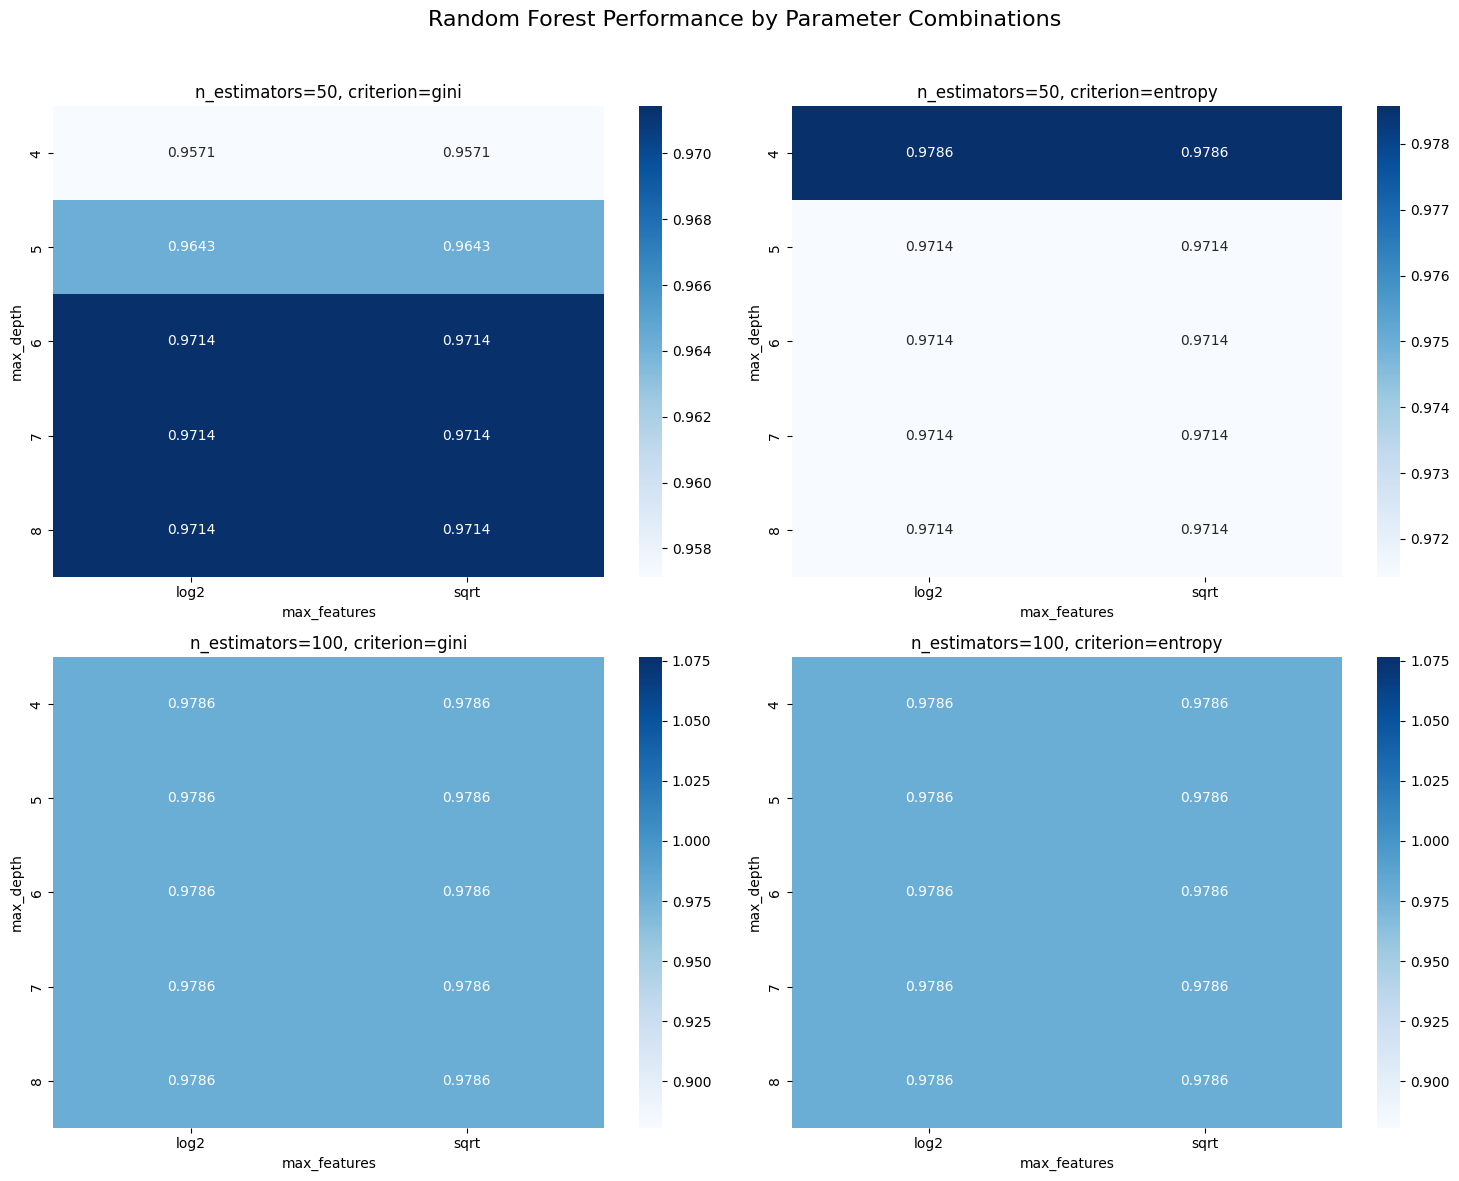

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a figure with subplots - one for each combination of n_estimators and criterion
rf_results = pd.DataFrame(grid_search_rf.cv_results_)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()
n_estimators_values = grid_search_rf.param_grid['n_estimators']
criterion_values = grid_search_rf.param_grid['criterion']
plot_idx = 0

for n_est in n_estimators_values:
    for crit in criterion_values:
        subset = rf_results[(rf_results['param_n_estimators'] == n_est) &
                         (rf_results['param_criterion'] == crit)]

        pivot_table = subset.pivot_table(
            values='mean_test_score',
            index='param_max_depth',
            columns='param_max_features'
        )

        ax = axes[plot_idx]
        sns.heatmap(pivot_table, annot=True, cmap='Blues', ax=ax, fmt='.4f')
        ax.set_title(f'n_estimators={n_est}, criterion={crit}')
        ax.set_xlabel('max_features')
        ax.set_ylabel('max_depth')

        plot_idx += 1

# Add a title to the overall figure
plt.suptitle('Random Forest Performance by Parameter Combinations', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [46]:
# Make predictions on the testing data using the best model
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(X_test)

print(y_test.tolist())
print(y_pred.tolist())

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy = precision_score(y_test, y_pred,average='weighted')
accuracy = f1_score(y_test, y_pred,average='weighted')
print("F1:", accuracy)

[0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0]
[0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0]
Accuracy: 1.0
F1: 1.0


In [47]:
from sklearn.svm import SVC

# Set up a parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}  # We only use an RBF kernel

# Create an SVC classifier
svc = SVC()

# Perform grid search with cross-validation
grid_search_svm = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search_svm.best_params_
print("Best Parameters:", best_params)

# Make predictions on the testing data using the best model
best_svc = grid_search_svm.best_estimator_
y_pred = best_svc.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy = precision_score(y_test, y_pred,average='weighted')
accuracy = f1_score(y_test, y_pred,average='weighted')
print("F1:", accuracy)

Best Parameters: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy: 0.9444444444444444
F1: 0.9436036129748098


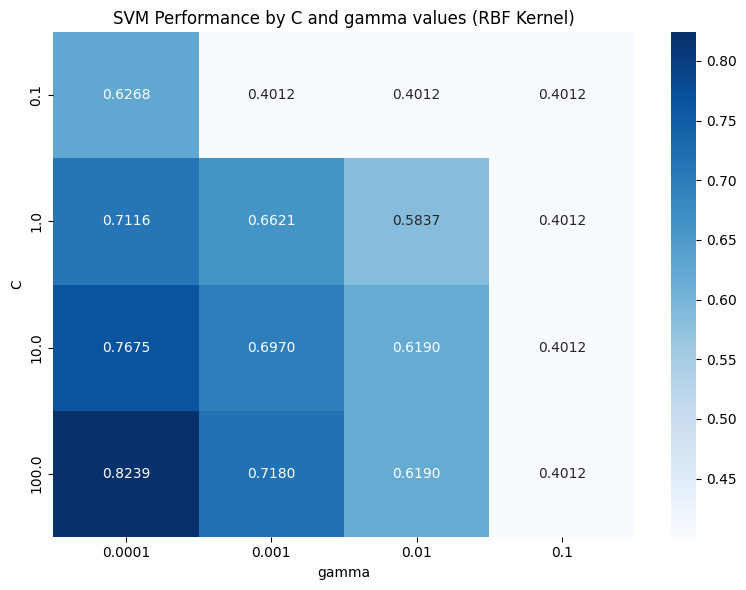

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plot the heatmap - C values vs gamma values
svm_results = pd.DataFrame(grid_search_svm.cv_results_)
plt.figure(figsize=(8, 6))

pivot_table = svm_results.pivot_table(
    values='mean_test_score',
    index='param_C',  # C values on the y-axis
    columns='param_gamma'  # gamma values on the x-axis
)

sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.4f')
plt.title('SVM Performance by C and gamma values (RBF Kernel)')
plt.xlabel('gamma')
plt.ylabel('C')

plt.tight_layout()
plt.show()

Based on these results, the best model for this dataset is the random forest classifier, with a perfect accuracy and F1 score on the test split.  Second is the SVM, and last is the k-means clustering method.  This may be due to the fact that random forest classifiers appear to work very well with higher numbers of features/higher dimensionality as well as SVM, while k means clustering appears to struggle with higher dimensional datasets.